Name: Saleh Abdallah

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [51]:
df = pd.read_excel('assignment dataset.xlsx')
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price
0,Government,Canada,Carretera,NaN,1618.5,3,20
1,Government,Germany,Carretera,NaN,1321.0,3,20
2,Midmarket,France,Carretera,NaN,2178.0,3,15
3,Midmarket,Germany,Carretera,NaN,888.0,3,15
4,Midmarket,Mexico,Carretera,NaN,2470.0,3,15


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Segment              200 non-null    object 
 1   Country              200 non-null    object 
 2   Product              200 non-null    object 
 3   Discount Band        147 non-null    object 
 4   Units Sold           200 non-null    float64
 5   Manufacturing Price  200 non-null    int64  
 6   Sale Price           200 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 11.1+ KB


In [53]:
# Handling missing values
# Get the total NaN count per column.
print(f'Total missing values:\n{df.isnull().sum()}\n')

Total missing values:
Segment                 0
Country                 0
Product                 0
Discount Band          53
Units Sold              0
Manufacturing Price     0
Sale Price              0
dtype: int64



In [54]:
df['Discount Band'].unique()

array([nan, 'Low'], dtype=object)

In [55]:
# Drop the Discount Band column
df = df.drop('Discount Band', axis=1)
df.head()

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price
0,Government,Canada,Carretera,1618.5,3,20
1,Government,Germany,Carretera,1321.0,3,20
2,Midmarket,France,Carretera,2178.0,3,15
3,Midmarket,Germany,Carretera,888.0,3,15
4,Midmarket,Mexico,Carretera,2470.0,3,15


In [56]:
# Handing duplicates
# Find all the duplicates rows.
print(f'There are {df.duplicated().sum()} duplicated rows.')

There are 0 duplicated rows.


In [ ]:
# EDA
# Create new features Profit per Unit Total Sales, and Total Profit
df['Profit per Unit'] = df['Sale Price'] - df['Manufacturing Price']
df['Total Sales'] = df['Units Sold'] * df['Sale Price']
df['Total Profit'] = df['Units Sold'] * df['Profit per Unit']
df.head()

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Profit per Unit,Total Sales,Total Profit
0,Government,Canada,Carretera,1618.5,3,20,17,32370.0,27514.5
1,Government,Germany,Carretera,1321.0,3,20,17,26420.0,22457.0
2,Midmarket,France,Carretera,2178.0,3,15,12,32670.0,26136.0
3,Midmarket,Germany,Carretera,888.0,3,15,12,13320.0,10656.0
4,Midmarket,Mexico,Carretera,2470.0,3,15,12,37050.0,29640.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Segment              200 non-null    object 
 1   Country              200 non-null    object 
 2   Product              200 non-null    object 
 3   Units Sold           200 non-null    float64
 4   Manufacturing Price  200 non-null    int64  
 5   Sale Price           200 non-null    int64  
 6   Profit per Unit      200 non-null    int64  
 7   Total Sales          200 non-null    float64
 8   Total Profit         200 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 14.2+ KB


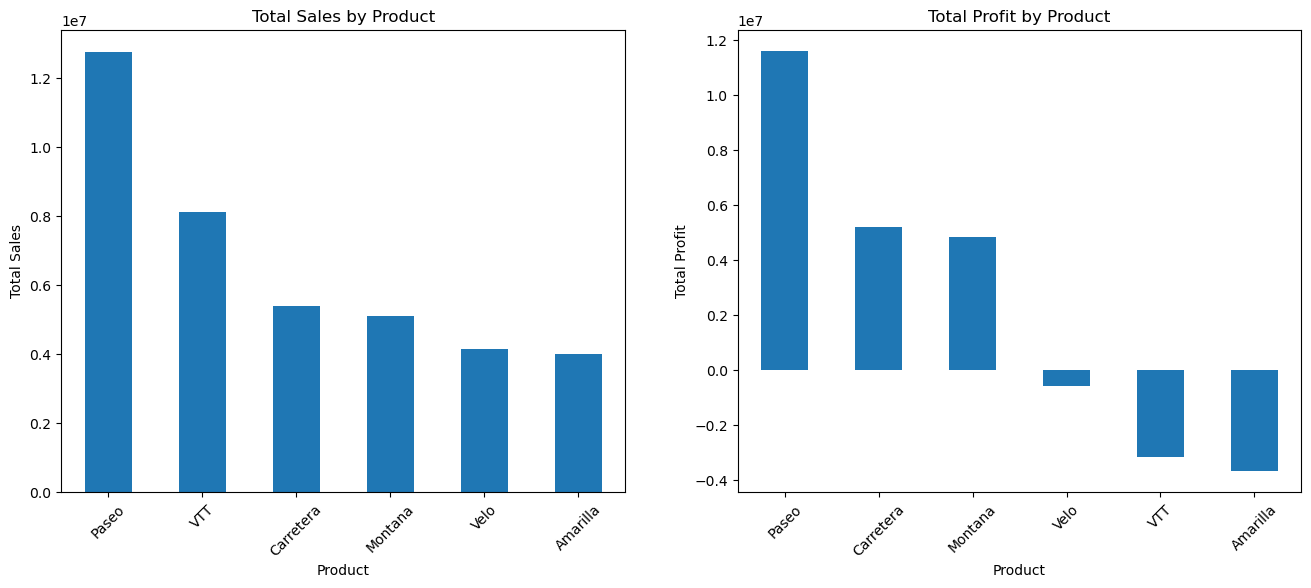

In [59]:
# Top Products by Sales vs Profit 
top_sales = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
top_profit = df.groupby('Product')['Total Profit'].sum().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Total Sales by Product
top_sales.plot(kind='bar', ax=axes[0])
axes[0].set_title('Total Sales by Product')
axes[0].set_ylabel('Total Sales')
axes[0].tick_params(axis='x', rotation=45)

# Total Profit by Product
top_profit.plot(kind='bar', ax=axes[1])
axes[1].set_title('Total Profit by Product')
axes[1].set_ylabel('Total Profit')
axes[1].tick_params(axis='x', rotation=45)
plt.show()

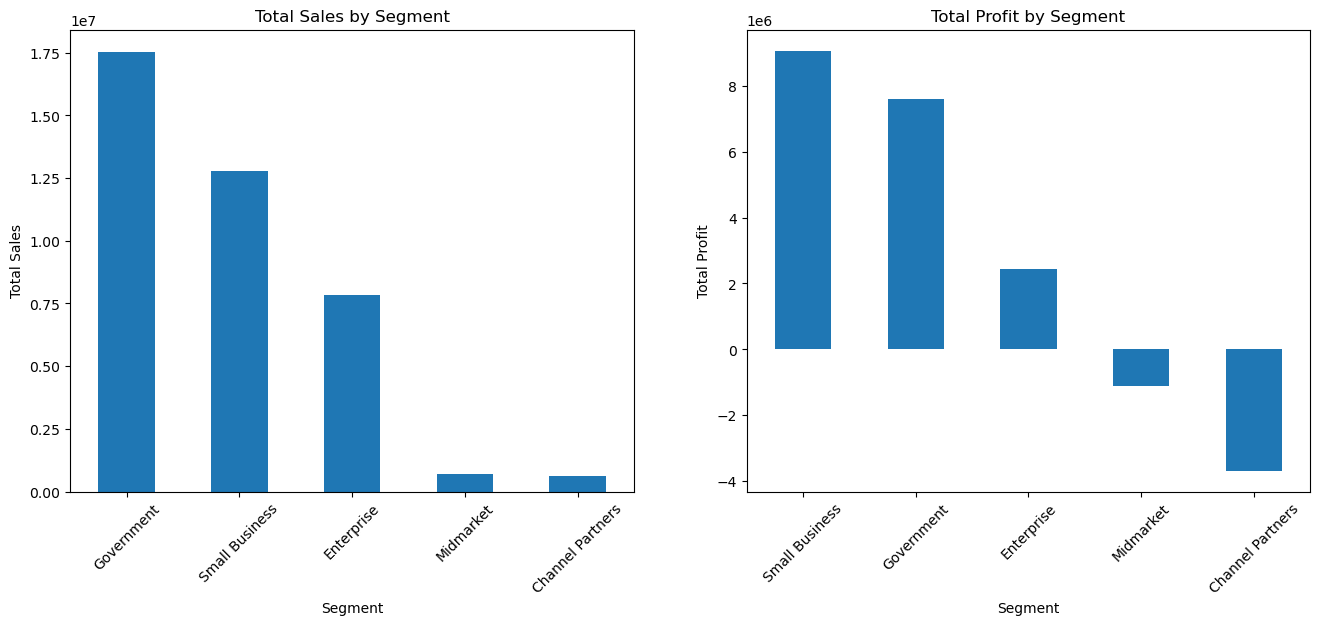

In [60]:
# Top Segments by Sales vs Profit 
top_sales = df.groupby('Segment')['Total Sales'].sum().sort_values(ascending=False)
top_profit = df.groupby('Segment')['Total Profit'].sum().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Total Sales by Segment
top_sales.plot(kind='bar', ax=axes[0])
axes[0].set_title('Total Sales by Segment')
axes[0].set_ylabel('Total Sales')
axes[0].tick_params(axis='x', rotation=45)

# Total Profit by Segment
top_profit.plot(kind='bar', ax=axes[1])
axes[1].set_title('Total Profit by Segment')
axes[1].set_ylabel('Total Profit')
axes[1].tick_params(axis='x', rotation=45)
plt.show()

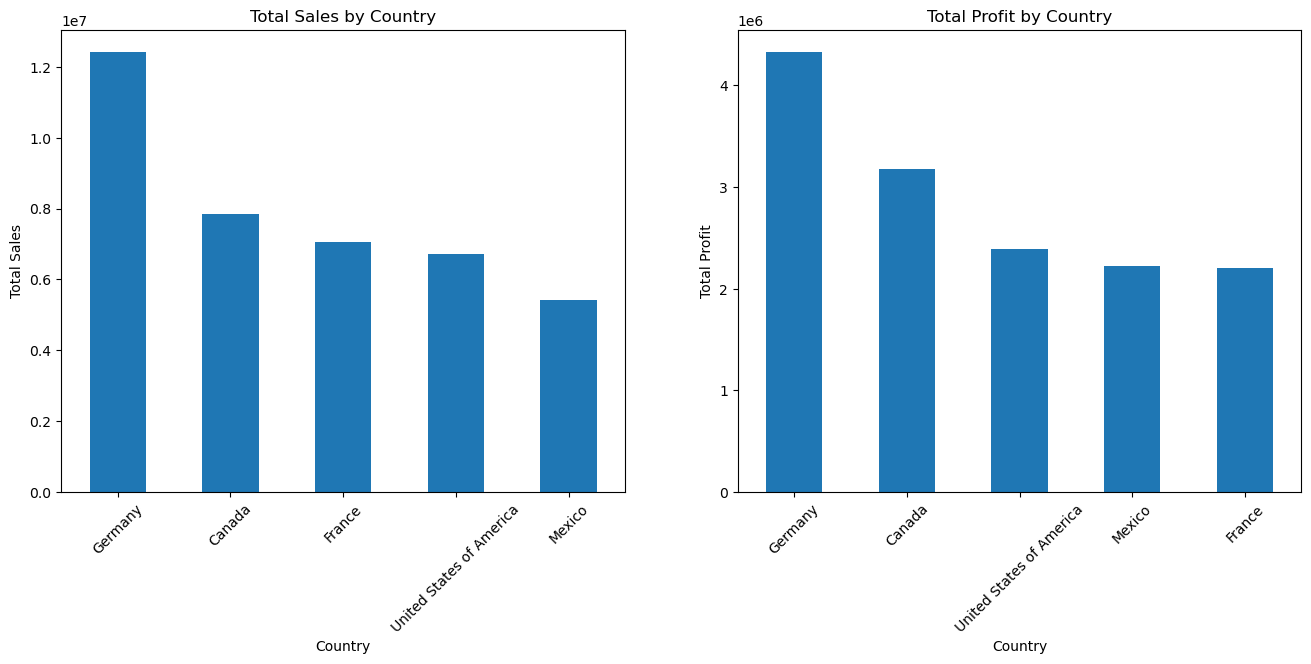

In [61]:
# Top Countries by Sales vs Profit 
top_sales = df.groupby('Country')['Total Sales'].sum().sort_values(ascending=False)
top_profit = df.groupby('Country')['Total Profit'].sum().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Total Sales by Country
top_sales.plot(kind='bar', ax=axes[0])
axes[0].set_title('Total Sales by Country')
axes[0].set_ylabel('Total Sales')
axes[0].tick_params(axis='x', rotation=45)

# Total Profit by Country
top_profit.plot(kind='bar', ax=axes[1])
axes[1].set_title('Total Profit by Country')
axes[1].set_ylabel('Total Profit')
axes[1].tick_params(axis='x', rotation=45)
plt.show()

EDA Report

Product Insights:

* Paseo is the top performing product in both sales and profit.
* Despite some sales Amarilla and VTT are showing negative / low profits.
* No clear correlation between sales and profit being the most profitable (e.g. VTT).

Segment Insights:

* Government and Small Business segments are generating the highest sales and profits.
* Channel Partners and Midmarket segments are showing negative profits.

Country Insights:

* Germany and Canada are leading in both total sales and total profit respectively.
* USA with lower total sales is more profitable than France.
